In [1]:
import numpy as np
import matplotlib.pyplot as plt
import atlas_object as ao

In [ ]:
a#o.utils.download_test_data()

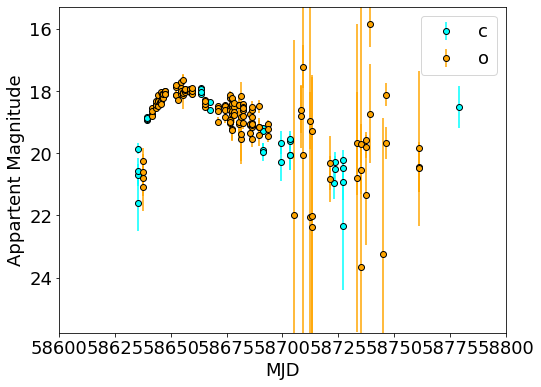

In [2]:
lc_file = 'test_lc.csv'
obj = ao.atlas_object(lc_file)
obj.plot_lcs(58600, 58800)

/home/tomas/atlas_object/atlas_object/utils.py:29: RuntimeWarning: divide by zero encountered in log10
  mag = -2.5 * np.log10(flux_) + zp
/home/tomas/atlas_object/atlas_object/utils.py:30: RuntimeWarning: divide by zero encountered in divide
  mag_err = np.abs(2.5 * flux_err / (flux_ * np.log(10)))
/home/tomas/anaconda3/envs/atlas_obj/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3458: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


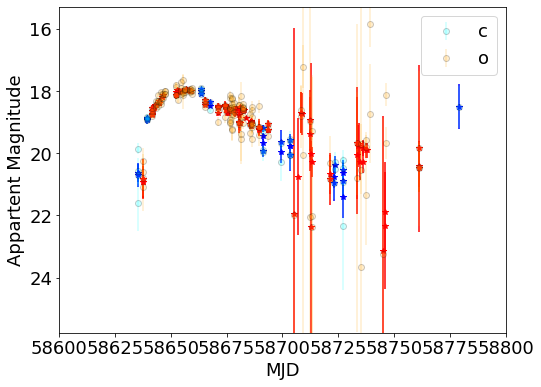

In [3]:
sigclip_kwargs = {
    'n_sigma':1
                 }
obj.rolling(3, center=False, sigma_clip=True, **sigclip_kwargs)
obj.plot_lcs(58600, 58800)

AttributeError: 'lightcurve' object has no attribute 'indices'

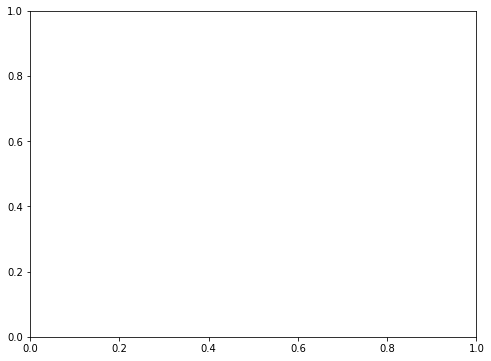

In [3]:
mags = np.empty(0)

fig, ax = plt.subplots(figsize=(8, 6))
for filt in 'co':
    lc = obj.init_lcs[filt]
    time = lc.time
    mag = lc.mag
    mag_err = lc.mag_err
    mask = ~obj.lcs[filt].indices
    ax.errorbar(time, mag, mag_err, 
                fmt='o', c=lc.color, mec='k',
                alpha=0.2)
    ax.errorbar(time[mask], mag[mask], mag_err[mask], 
                fmt='o', label=filt, c=lc.color, mec='k'
               )
    mags = np.r_[mags, mag]

ax.set_ylabel('Appartent Magnitude', fontsize=18)
ax.set_xlabel('MJD', fontsize=18)
ax.tick_params(labelsize=18)
ax.set_ylim(mags.min()-0.5, mags.max()+0.5)
ax.set_xlim(58600, 58800)
ax.invert_yaxis()
ax.legend(fontsize=18)
plt.show()